In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import silhouette_score
from time import time
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

In this task, you will implement a K-Means algorithm from scratch using the dataset "HTRU 2.csv". The
dataset contains 8 continuous variables describing a pulsar candidate1
. The task is to identify multiple (K)
clusters that might best describe the classes within the data.
1. [8 Points] Initialize the cluster centers by selecting the first center at random and the rest sequentially
based on the largest sum of distances to the selected cluster center. Run with different random initialization.
Plot, a figure showing the selection of the best number of clusters K for each initialization.
2. [Bonus** 2 Points] Optimize the algorithm and show runtime improvements.
3. [1 Point] Try to compare your results (cluster centers, loss/distortion) and runtime to the sklearn
implementation of KMeans clustering algorithm for the same dataset.
4. [5 Points] Principal Components Analysis (PCA) is a widely used method for reducing the number of
dimensions to a low dimensional representation of the data. (You are allowed to use numpy.linalg.svd for
single value decomposition). Use PCA to reduce the dimensionality of the data and represent the clusters
(from the K-Means) in a 2D or 3D graph.

### 1) K-Means

In [2]:

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


class KMeansOptimized:
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps
        self.clusters = [[] for _ in range(self.K)]
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # Initialize centroids 
        self.centroids = self._initialize_centroids()

        for _ in range(self.max_iters):
            # Assigning samples to closest centroids
            self.clusters = self._create_clusters(self.centroids)

            # Calculating new centroids..
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            if self._is_converged(centroids_old, self.centroids):
                break

        return self._get_cluster_labels(self.clusters)

    def _initialize_centroids(self):
        centroids = []
        centroids.append(self.X[np.random.choice(self.n_samples)])
        for _ in range(1, self.K):
            distances = np.array([min([euclidean_distance(x, c) for c in centroids]) for x in self.X])
            next_centroid = self.X[np.argmax(distances)]
            centroids.append(next_centroid)
        return np.array(centroids)

    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        distances = [euclidean_distance(sample, point) for point in centroids]
        return np.argmin(distances)

    def _get_centroids(self, clusters):
        return np.array([np.mean(self.X[cluster], axis=0) for cluster in clusters])

    def _is_converged(self, centroids_old, centroids):
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels


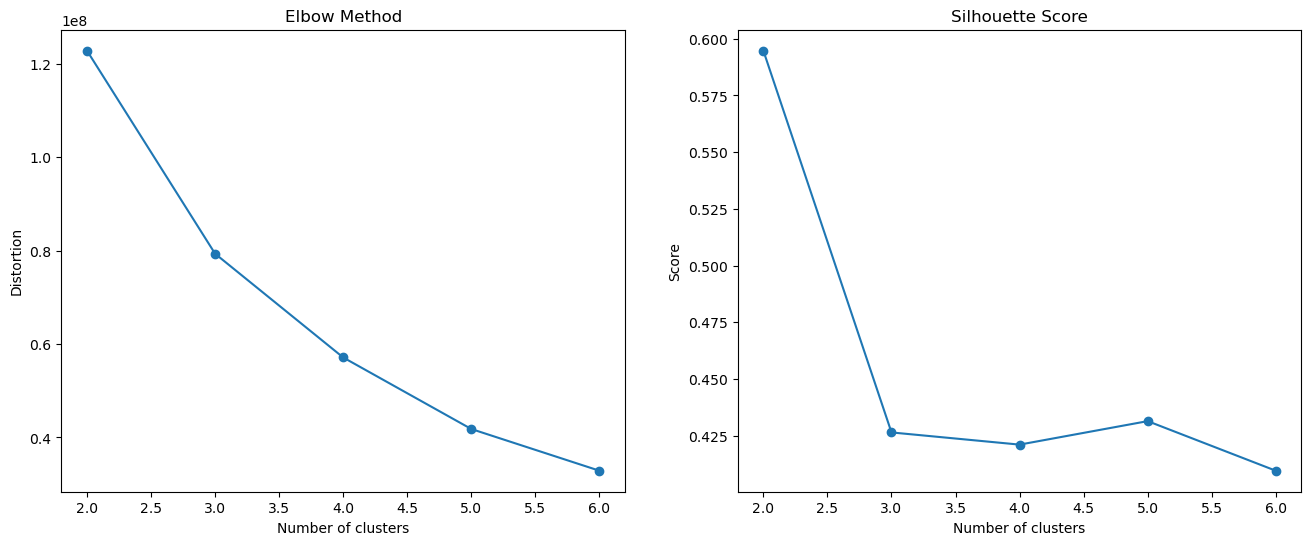

Runtime for evaluating optimal K: 1899.20 seconds


In [3]:
# Evaluate optimal K
def evaluate_optimal_k(X, max_k=10):
    distortions = []
    silhouette_scores = []
    for k in range(2, max_k + 1):
        kmeans = KMeansOptimized(K=k, max_iters=100)
        labels = kmeans.predict(X)
        distortions.append(sum([euclidean_distance(X[idx], kmeans.centroids[cluster_idx]) ** 2
                                for cluster_idx, cluster in enumerate(kmeans.clusters) for idx in cluster]))
        silhouette_scores.append(silhouette_score(X, labels))


    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].plot(range(2, max_k + 1), distortions, marker='o')
    ax[0].set_title('Elbow Method')
    ax[0].set_xlabel('Number of clusters')
    ax[0].set_ylabel('Distortion')

    ax[1].plot(range(2, max_k + 1), silhouette_scores, marker='o')
    ax[1].set_title('Silhouette Score')
    ax[1].set_xlabel('Number of clusters')
    ax[1].set_ylabel('Score')

    plt.show()
    

df = pd.read_csv('HTRU_2.csv')
X = df.values

start_time = time()
evaluate_optimal_k(X, max_k=6)
print(f"Runtime for evaluating optimal K: {time() - start_time:.2f} seconds")

    # Example clustering with best K
best_k = 4  # Choose based on evaluation
kmeans = KMeansOptimized(K=best_k, max_iters=8, plot_steps=False)
y_pred = kmeans.predict(X)

In [10]:
y_pred

array([0., 0., 3., ..., 3., 0., 3.])

In [25]:
### Jara

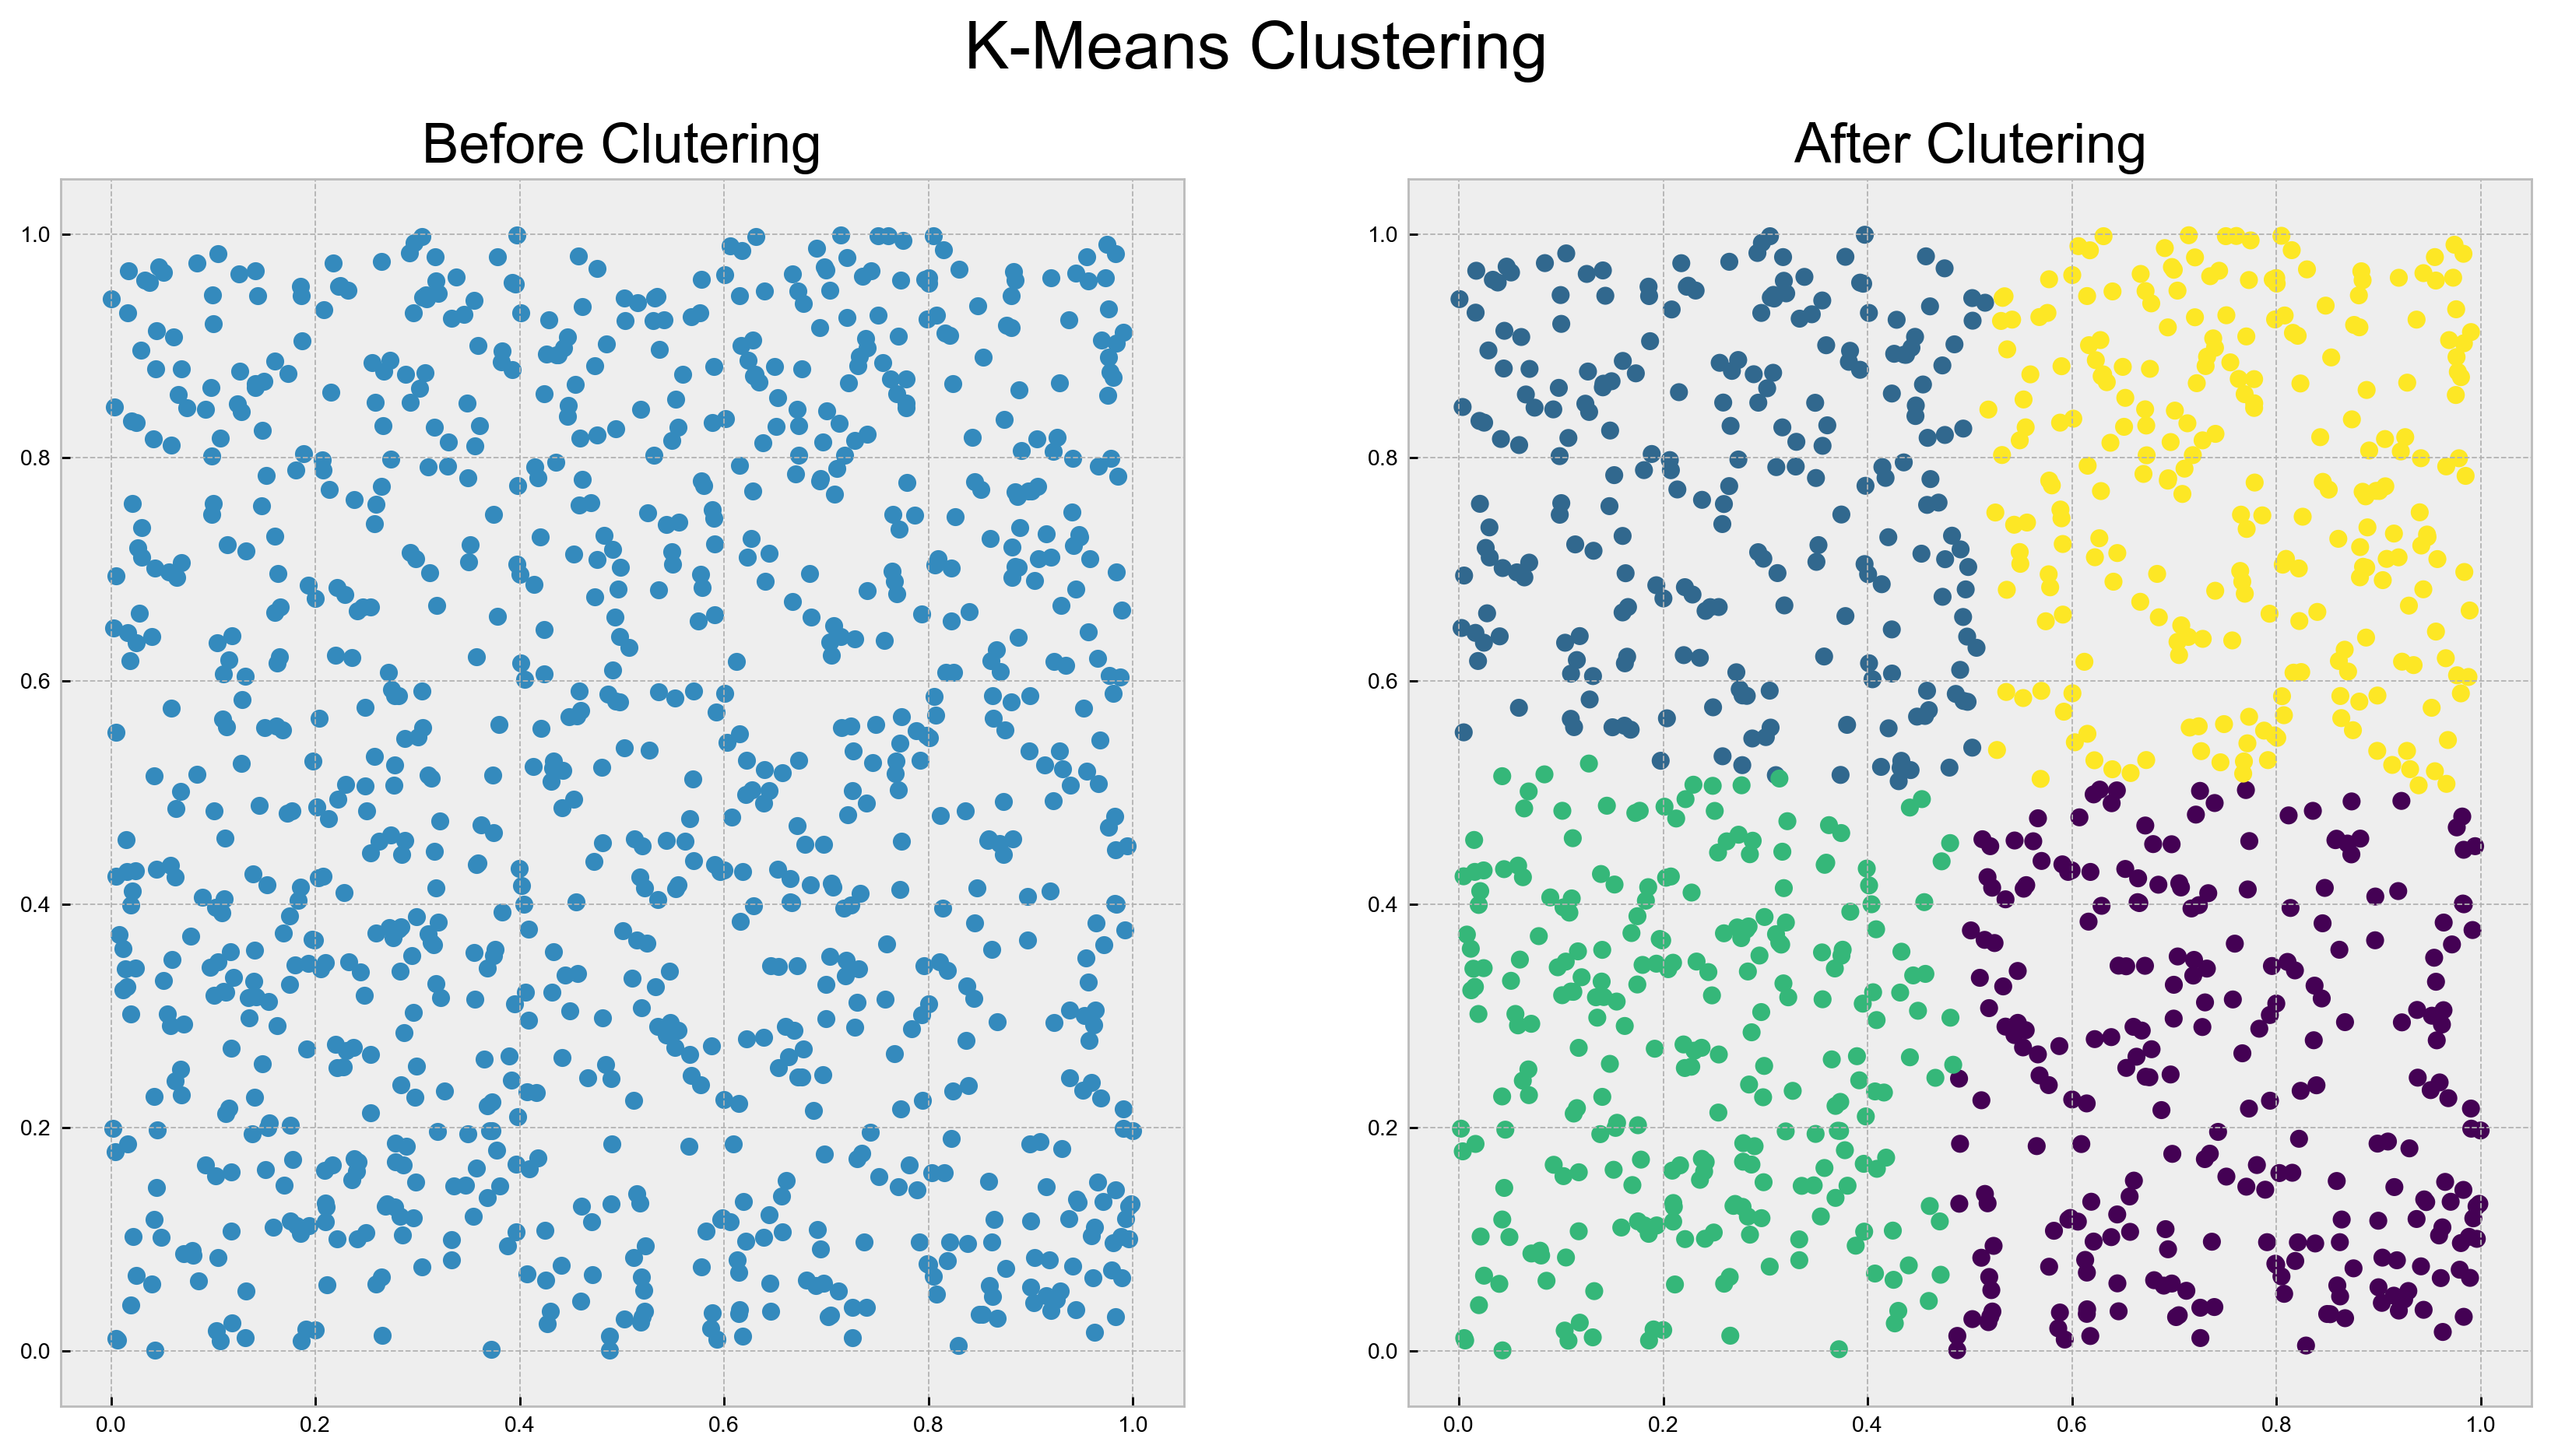

In [43]:
import numpy as np

from dataclasses import dataclass


@dataclass
class KMeans:
    k: int
    iterations: int
    tol: float

    def fit(self, features: np.ndarray) -> None:
        """Clusters the data."""

        num_samples, _ = features.shape

        self.centroids = features[np.random.choice(num_samples, size=self.k, replace=False)]
        self.closest = np.zeros(num_samples)

        for _ in range(self.iterations):
            old_closest = self.closest.copy()

            distances = [np.linalg.norm(self.centroids - feature, axis=1) for feature in features]
           # print(distances)
            self.closest = np.argmin(distances, axis=1)

            for idx in range(self.k):
                self.centroids[idx] = (features[self.closest == idx]).mean(axis=0)

            if np.linalg.norm(self.closest - old_closest) < self.tol:
              break
                
            # if np.array_equal(self.closest, old_closest):
            #     break
                
            


if __name__ == "__main__":
    plt.rcParams['font.family'] = 'Arial'

    np.random.seed(0)

    features = np.random.rand(1_000, 2)

    kmeans = KMeans(k=4, iterations=16, tol=1e-4)
    kmeans.fit(features)

    fig, axs = plt.subplots(nrows=1, ncols=2)
    fig.suptitle("K-Means Clustering", fontsize=24)

    axs[0].scatter(features[:, 0], features[:, 1])
    axs[0].set_title("Before Clutering", fontsize=20)

    axs[1].scatter(features[:, 0], features[:, 1], c=kmeans.closest)
    axs[1].set_title("After Clutering", fontsize=20)


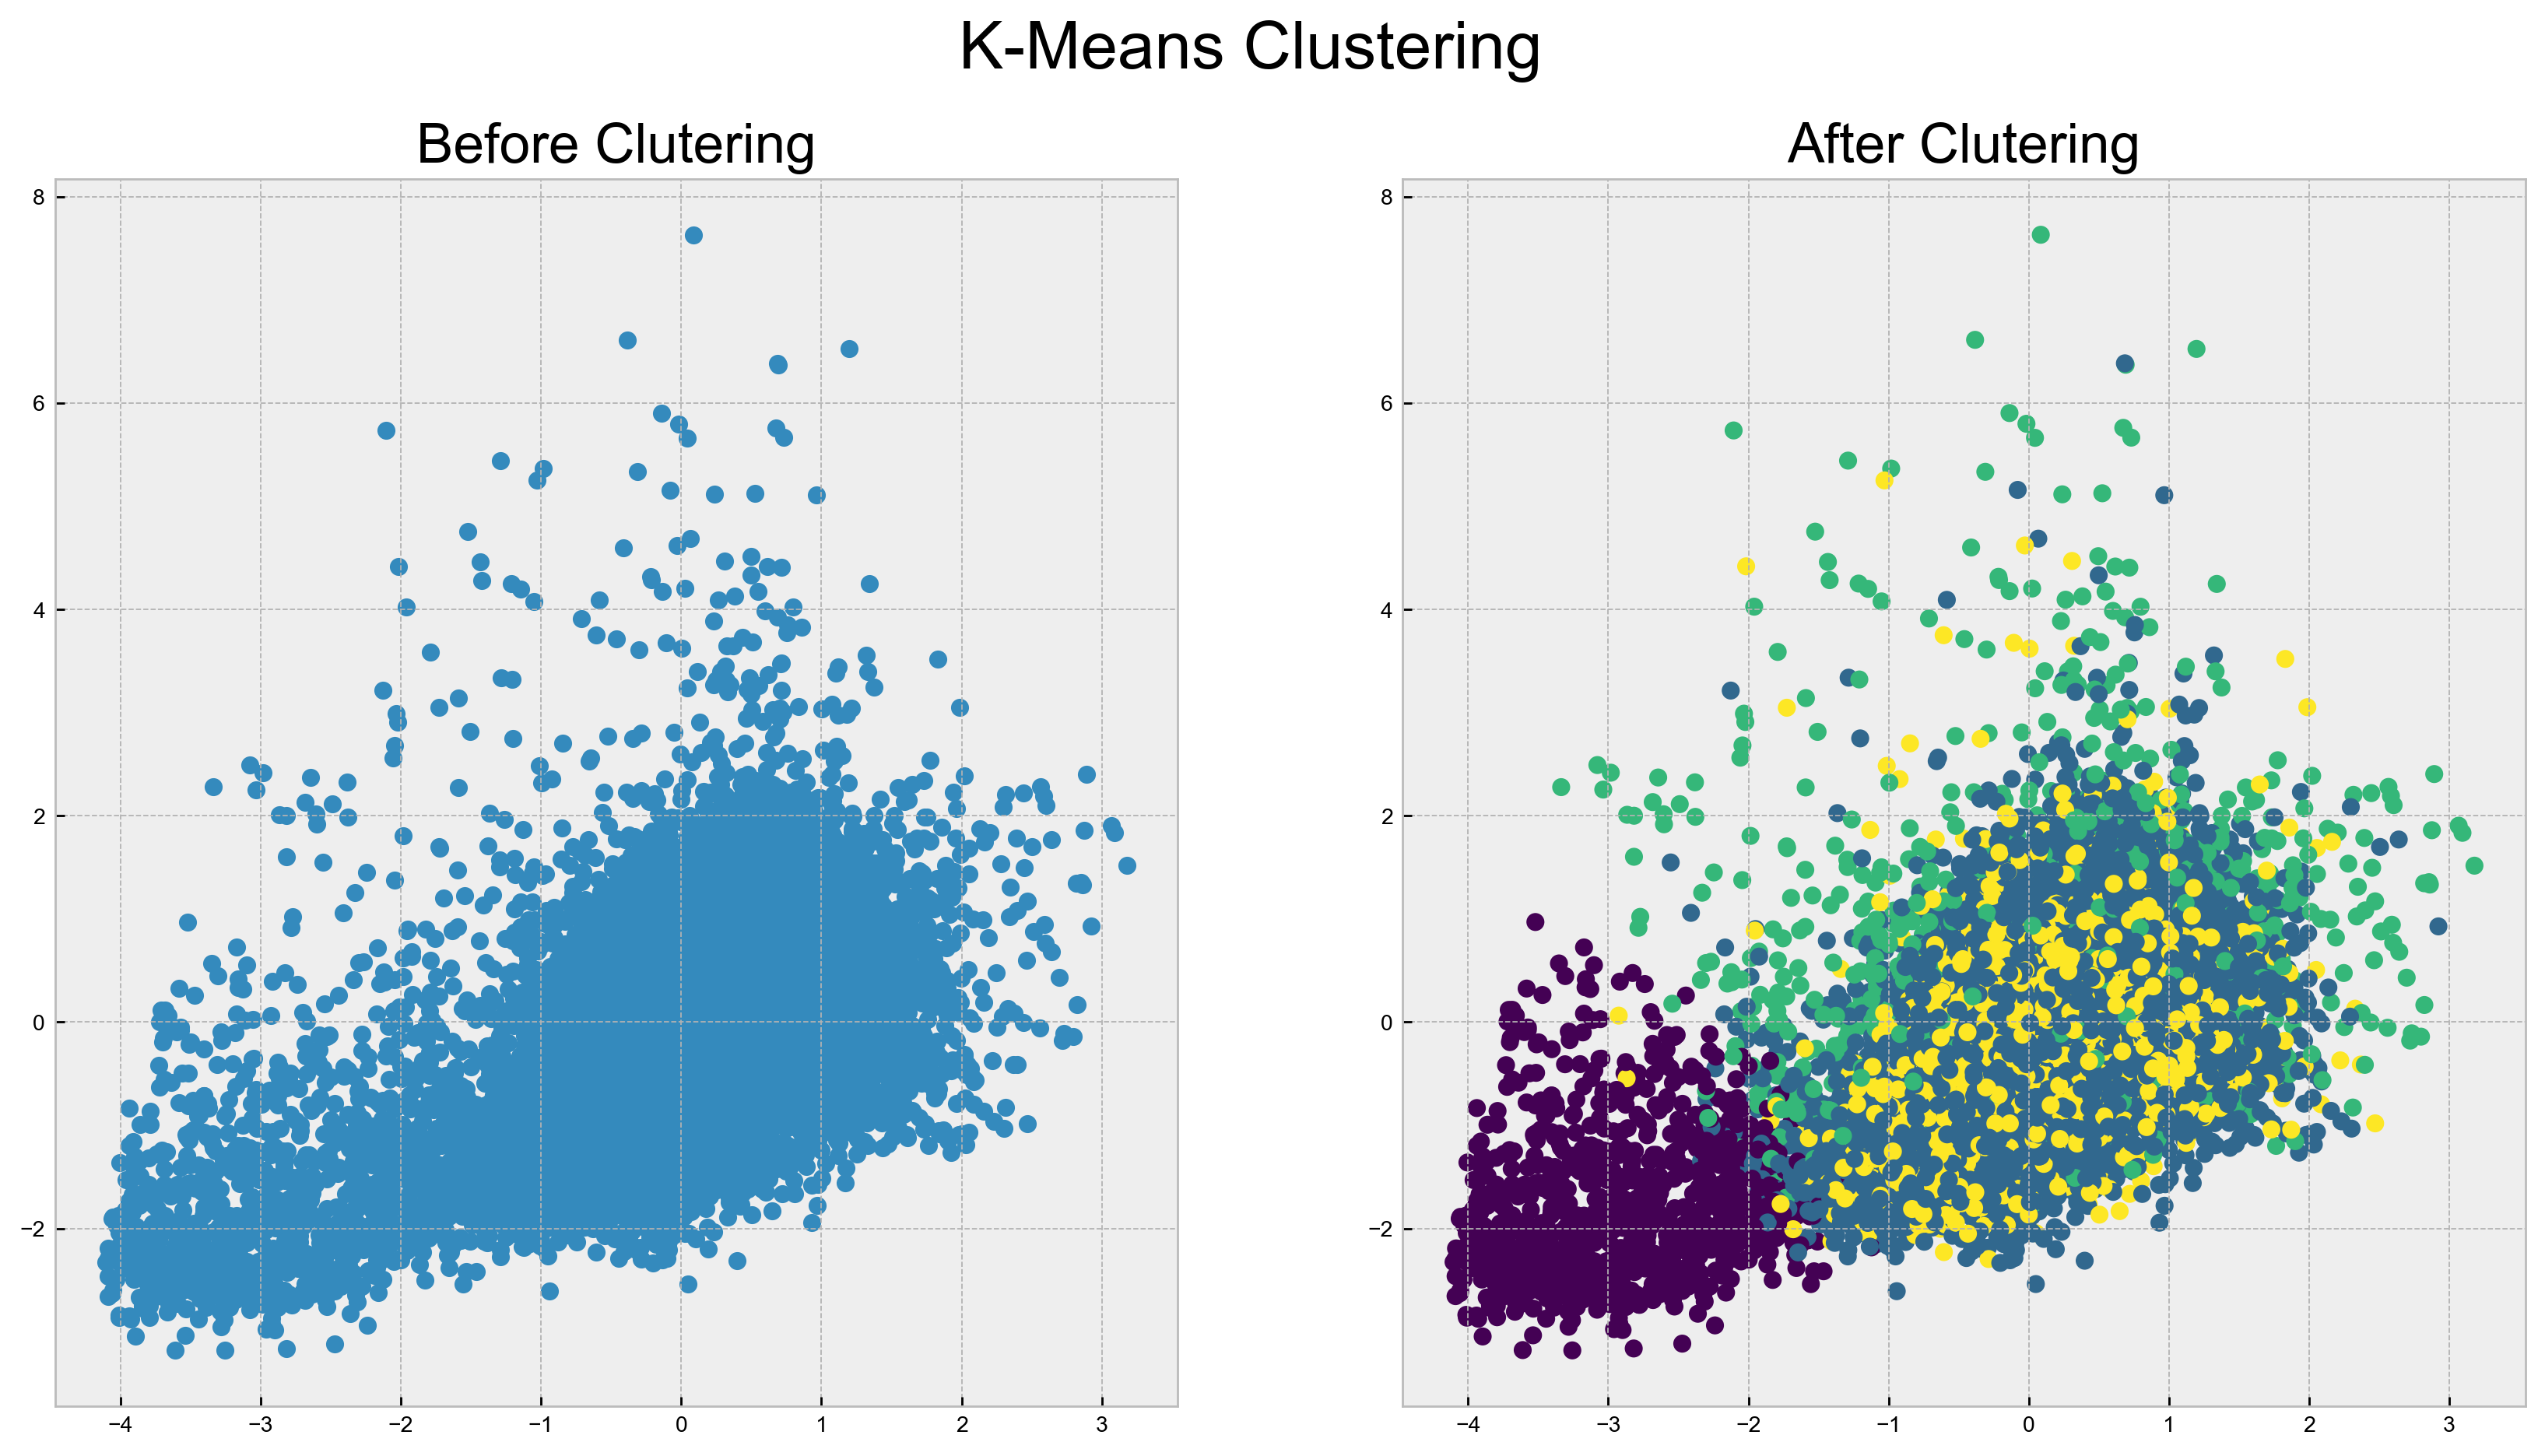

In [45]:
import numpy as np
import pandas as pd
from dataclasses import dataclass
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

@dataclass
class KMeans:
    k: int
    iterations: int
    tol: float

    def fit(self, features: np.ndarray) -> None:
        """Clusters the data."""

        num_samples, _ = features.shape
        #print(num_samples)

        self.centroids = features[np.random.choice(num_samples, size=self.k, replace=False)]
        #print(self.centroids)
        self.closest = np.zeros(num_samples)
       

        for _ in range(self.iterations):
            old_closest = self.closest.copy()

            distances = [np.linalg.norm(self.centroids - feature, axis=1) for feature in features]
            #print(distances)
            self.closest = np.argmin(distances, axis=1)
            #print(self.closest)

            for idx in range(self.k):
                self.centroids[idx] = (features[self.closest == idx]).mean(axis=0)
              #  print(self.centroids[idx])

            if np.linalg.norm(self.closest - old_closest) < self.tol:
                break

if __name__ == "__main__":
    np.random.seed(0)
    plt.rcParams['font.family'] = 'Arial'
    
    data = pd.read_csv("HTRU_2.csv", header=None)
    features = data.values

    features = data.apply(pd.to_numeric, errors='coerce').values
    features = features[~np.isnan(features).any(axis=1)] # Remove any rows with NaN values
    features = (features - features.mean(axis=0)) / features.std(axis=0) # Normalize the features

    kmeans = KMeans(k=4, iterations=50, tol=1e-4)
    kmeans.fit(features)
    fig, axs = plt.subplots(nrows=1, ncols=2)
    fig.suptitle("K-Means Clustering", fontsize=24)

    axs[0].scatter(features[:, 0], features[:, 1])
    axs[0].set_title("Before Clutering", fontsize=20)

    axs[1].scatter(features[:, 0], features[:, 1], c=kmeans.closest)
    axs[1].set_title("After Clutering", fontsize=20)




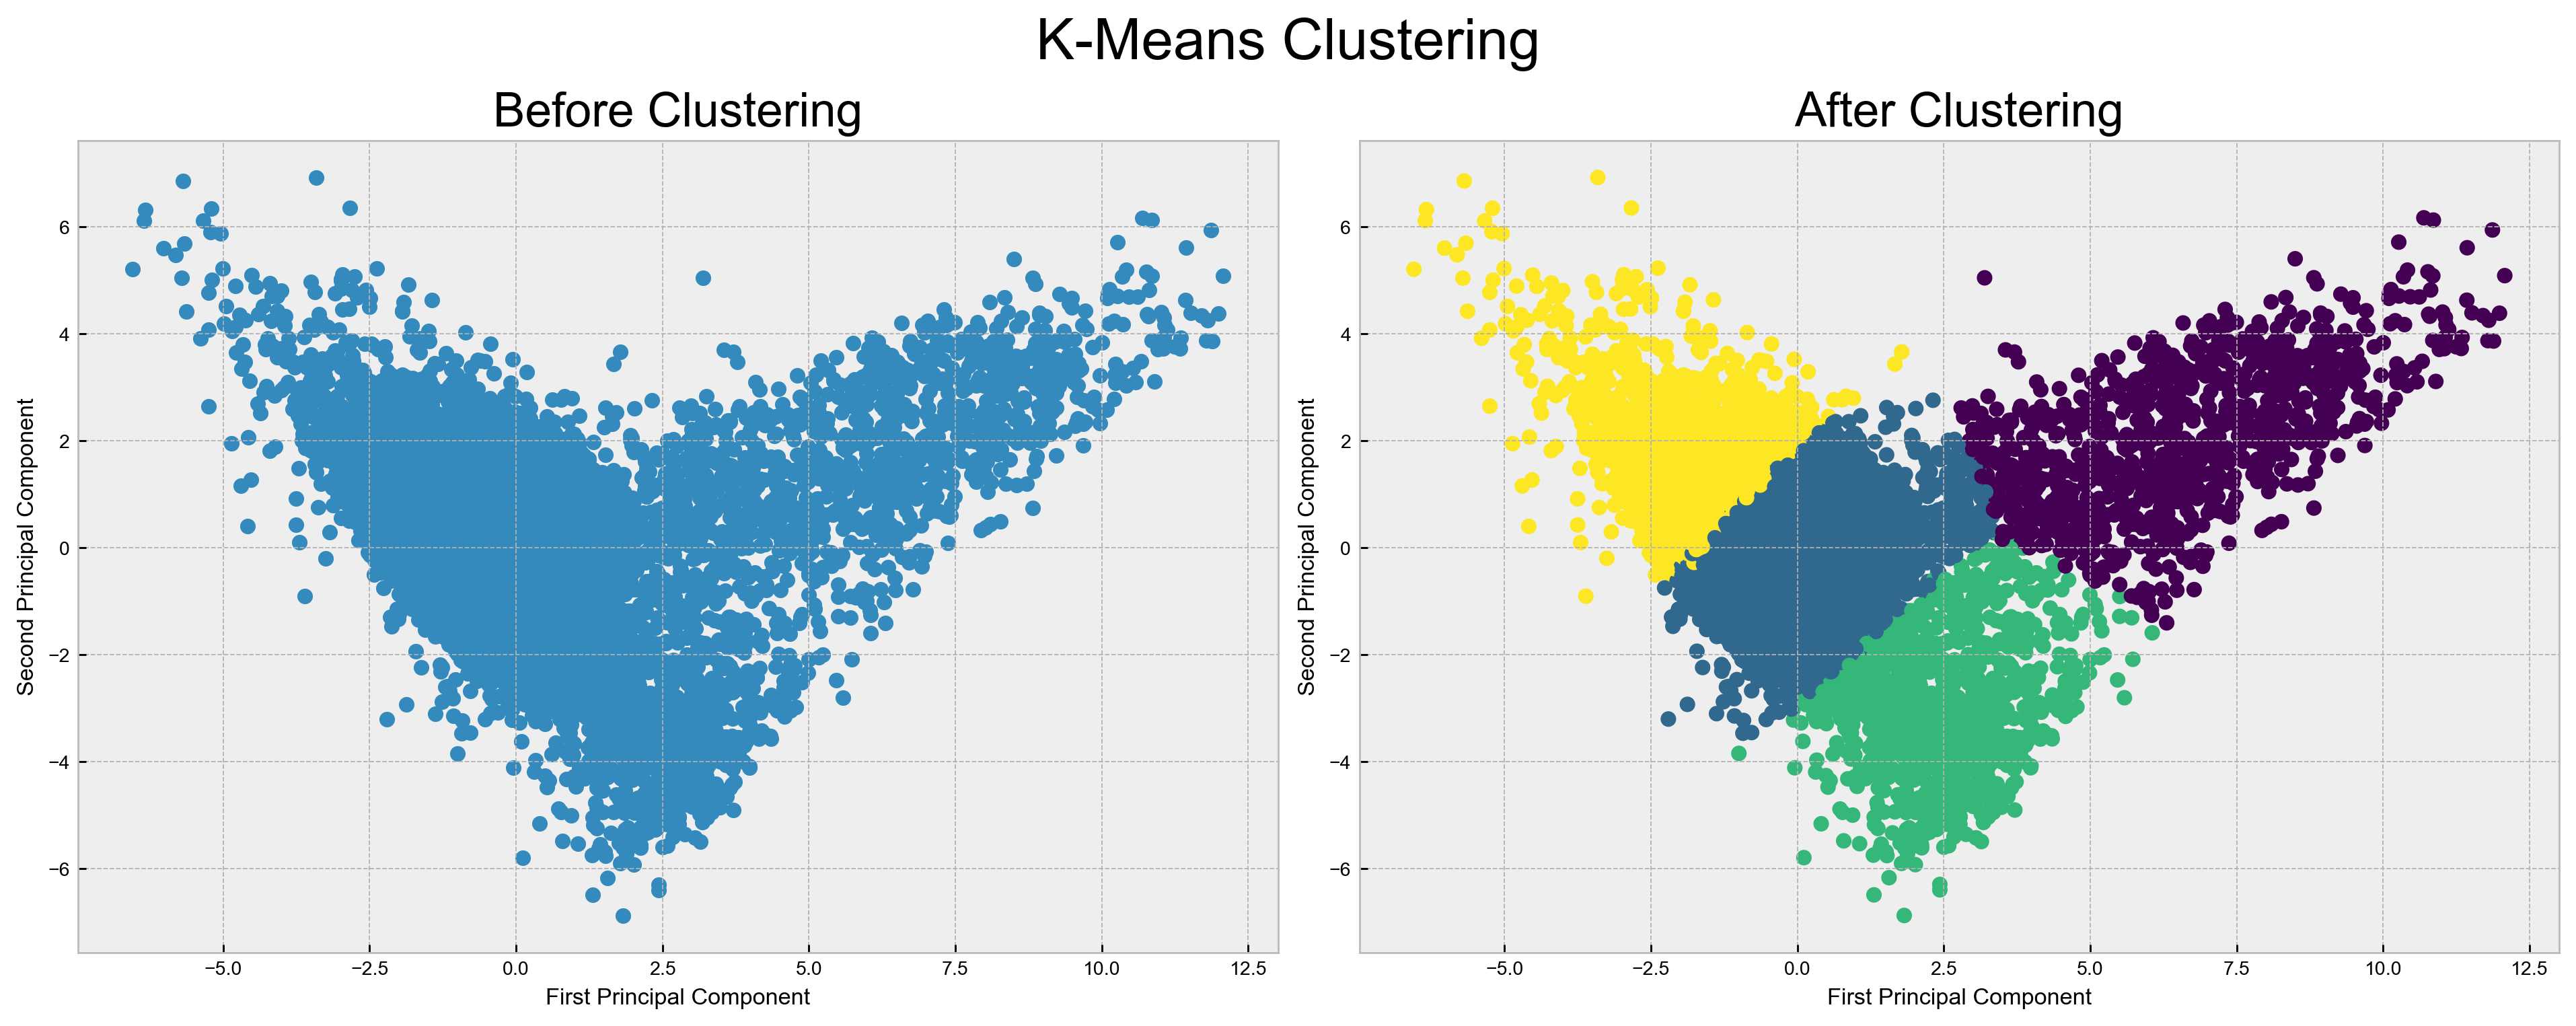

In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
reduced_features = pca.fit_transform(features)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
fig.suptitle("K-Means Clustering", fontsize=24)

axs[0].scatter(reduced_features[:, 0], reduced_features[:, 1])
axs[0].set_title("Before Clustering", fontsize=20)
axs[0].set_xlabel("First Principal Component")
axs[0].set_ylabel("Second Principal Component")

axs[1].scatter(reduced_features[:, 0], reduced_features[:, 1], c=kmeans.closest)
axs[1].set_title("After Clustering", fontsize=20)
axs[1].set_xlabel("First Principal Component")
axs[1].set_ylabel("Second Principal Component")

plt.tight_layout()
plt.show()

In [ ]:
distortion_custom = sum([
    euclidean_distance(X[idx], kmeans_custom.centroids[cluster_idx]) ** 2
    for cluster_idx, cluster in enumerate(kmeans_custom.clusters)
    for idx in cluster
])

runtime_custom, kmeans_custom.centroids, distortion_custom

#### Sklearn Kmeans

In [60]:
from sklearn.cluster import KMeans

# Run scikit-learn's KMeans implementation
start_time = time()
kmeans_sklearn = KMeans(n_clusters=4, max_iter=8, random_state=0, init='k-means++')
kmeans_sklearn.fit(X)
runtime_sklearn = time() - start_time

# Extract results from scikit-learn implementation
centroids_sklearn = kmeans_sklearn.cluster_centers_
distortion_sklearn = kmeans_sklearn.inertia_  # Sum of squared distances to closest centroid

# Output scikit-learn results
runtime_sklearn, centroids_sklearn, distortion_sklearn


C:\Users\tegbe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(0.988760232925415,
 array([[1.15964967e+02, 4.68764368e+01, 2.26292669e-01, 4.11710880e-01,
         2.65023505e+00, 1.77565360e+01, 9.03515739e+00, 9.86655294e+01],
        [1.14012822e+02, 4.64126667e+01, 2.51602041e-01, 4.94391969e-01,
         1.32035260e+00, 1.22676788e+01, 1.38726130e+01, 2.37439809e+02],
        [1.01128804e+02, 4.60003613e+01, 1.02992707e+00, 4.77714743e+00,
         3.57606883e+01, 4.88868210e+01, 3.32384360e+00, 1.65258454e+01],
        [1.15564444e+02, 4.75141510e+01, 2.16842603e-01, 3.79980279e-01,
         6.46129545e-01, 9.33803610e+00, 2.17424191e+01, 5.50353765e+02]]),
 57189270.795420825)

### Using PCA to represent the data

In [64]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def perform_pca(X, n_components=2):
    # Center the data
    X_mean = np.mean(X, axis=0)
    X_centered = X - X_mean

    U, S, Vt = np.linalg.svd(X_centered, full_matrices=False) # Singular Value Decomposition
    X_pca = np.dot(X_centered, Vt[:n_components].T) # Projecting the data onto principal components
    return X_pca

# dataset (2D)
X_pca_2d = perform_pca(X, n_components=2)


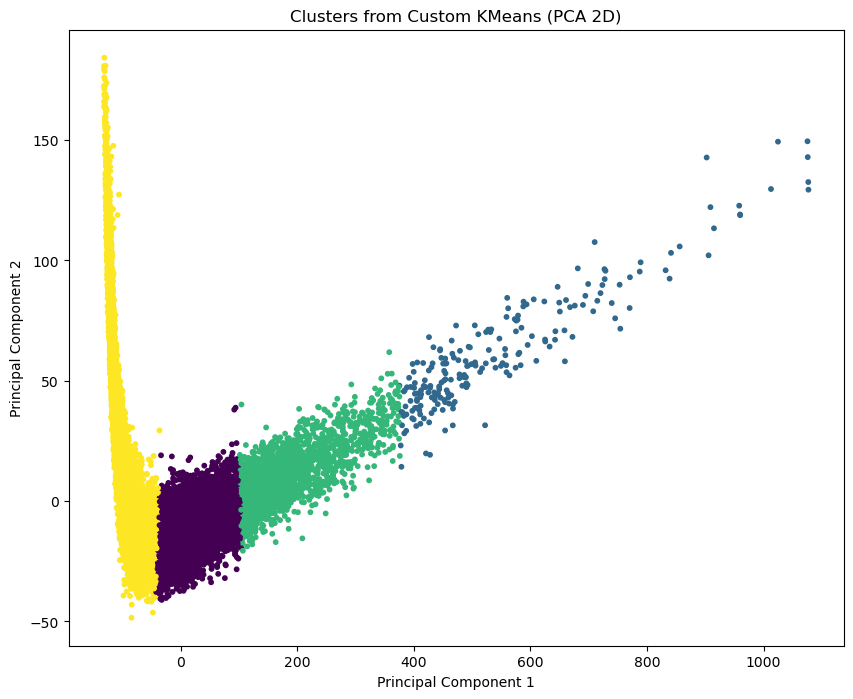

In [67]:
def plot_clusters_2d(X_pca, labels, title="2D PCA Cluster Representation"):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=10)
    plt.title(title)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()

plot_clusters_2d(X_pca_2d, y_pred, title="Clusters from Custom KMeans (PCA 2D)") #Using our Kmeans implementation labels

In [ ]:
### jara kmeans and mediods

import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance_matrix

np.set_printoptions(precision=4, floatmode="fixed", suppress=True)

X = np.array(
    [
        [0, 0],
        [0, 1],
        [-1, 2],
        [2, 0],
        [3, 0],
        [4, -1],
    ]
)
plt.scatter(*X.T);

D = (distance_matrix(X, X) ** 2).astype(int)

# define constants
MAXITER = 10
K = 2

# initialize empty clusters
clusters = [[]] * K

# initialize centers with first and last datapoint
centers = X[[0, -1]].tolist()  # K×d matrix

for it in range(MAXITER):
    print(f"{it=:3d}  {clusters=}  {centers=}")
    prev_clusters = clusters.copy()
    prev_centers = centers.copy()

    # compute cluster association (E-step)
    dists = distance_matrix(centers, X) ** 2  # KxN matrix with D(k,n) = ‖xₙ - μₖ‖²

    # compute closest center for each datapoint
    closest_center = np.argmin(D, axis=0)

    # reassign clusters
    for k in range(K):
        clusters[k] = np.argwhere(closest_center == k).flatten().tolist()

    # compute new cluster centers (M-step)
    for k in range(K):
        centers[k] = np.mean(X[clusters[k]], axis=0).tolist()

    # check if clusters have changed since last iteration
    if clusters == prev_clusters and np.allclose(centers, prev_centers):
        break
else:  # executed if for loop did not break
    raise RuntimeError("Maximum number of iterations reached")

##### k mediods
# define constants
MAXITER = 10
K = 2

# initialize cluster centers with first and last datapoint
centers = [0, -1]  # indices of centers

# initialize empty clusters
clusters = [[]] * K

for it in range(MAXITER):
    print(f"{it=:3d}  {clusters=}  {centers=}")
    prev_clusters = clusters.copy()
    prev_centers = centers.copy()

    # compute cluster association (E-step)
    # find closest center for each point
    closest_center = np.argmin(D[centers], axis=0)  # N×1

    # reassign clusters
    for k in range(K):
        clusters[k] = np.argwhere(closest_center == k).flatten().tolist()

    # compute new cluster centers (M-step)
    for k in range(K):
        # compute mean over k-th cluster
        mask = closest_center == k
        dists = D[np.ix_(mask, mask)]  # select submatrix of dists in cluster k
        best = np.argmin(np.mean(dists, axis=-1))
        centers[k] = clusters[k][best]

    # check if clusters have changed since last iteration
    if clusters == prev_clusters and centers == prev_centers:
        break
else:  # executed if for loop did not break
    raise RuntimeError("Maximum number of iterations reached")



In [ ]:
######code basics
df[['child_mort', 'income', 'gdpp']].hist(bins=20, figsize=(10, 6))
plt.suptitle('Distribution of Child Mortality, Income, and GDP per capita')
plt.show()

# Drop the 'country' column since it's not a numerical feature
df_cluster1 = df.drop('country', axis=1)


# Standardize the numerical features
scaler = StandardScaler()
features = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
df_cluster1[features] = scaler.fit_transform(df_cluster1[features])


#check few rows
df_cluster1.head()

# Perform KMeans clustering withh n_clusters as 4
km = KMeans(n_clusters=4, n_init='auto')

# Fit the KMeans model to the data (df_cluster)
km.fit(df_cluster1[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']])


#Print the inertia and centroids

#Inertia
print("Inertia", km.inertia_)

print('*' * 50)

#Centroids
print('Centroids')
centroids = km.cluster_centers_
print(centroids)

# Add the cluster labels to the original DataFrame 'df'.

df['Cluster'] = km.labels_
df.head(5)


#Create a pair plot to visualize the relationships between all relevant features, colored by cluster labels.

pair_plot = sns.pairplot(df, hue='Cluster', palette='viridis', diag_kind='kde', plot_kws={'s': 100})
pair_plot.fig.suptitle('Pair Plot of Socio-economic and Health Factors by Cluster', y=1.02)
plt.show()



In [ ]:
### Task3: Elbow Method for Determining Optimal Clusters

- Use the Elbow Method to determine the optimal number of clusters. Check clusters ranging from 1 to 20.
- Plot the Elbow Method graph to visualize the optimal number of clusters.
- Train the KMeans model using the number of clusters identified by the Elbow Method.


    # Determine the optimal number of clusters using the Elbow Method
sse = []
k_rng = range(4, 15)
for k in k_rng:
    km = KMeans(n_clusters=k, n_init='auto')
    km.fit(df_cluster1)
    sse.append(km.inertia_)

print(sse)

# Plot the Elbow Method graph
plt.plot(k_rng, sse)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

# Train the KMeans model using the number of clusters identified by the Elbow Method.

# Perform KMeans clustering withh optimal n_clusters
km = KMeans(n_clusters=6, n_init='auto')

# Fit the KMeans model to the data (df_cluster)
km.fit(df_cluster1[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']])

#assigning the cluster values
df['Cluster'] = km.labels_


#Print the inertia and centroids

#Inertia
print("Inertia", km.inertia_)

print('*' * 50)

#Centroids
print('Centroids')
centroids = km.cluster_centers_
print(centroids)



In [ ]:
### Task 4: Hierarchical Clustering

1. Apply hierarchical clustering using Agglomerative Clustering with 6 clusters.
2. Use the following parameters: `metric='cosine', linkage='complete'.
3. Assign cluster labels to the original DataFrame and print a sample of 10 rows to verify the cluster assignments.
4. Plot the dendrogram to visualize the hierarchical clustering process, using the first 50 data points to ensure clarity.
5. Create a pair plot to visualize the relationships between all relevant features, colored by cluster labels.


# apply Agglomerative Clustering (6 clusters, metric='cosine', linkage='complete')
hc = AgglomerativeClustering(n_clusters=6, metric='cosine', linkage='complete')
hc.fit(df_cluster1)

#Assign cluster labels to the original DataFrame and print a sample of 10 rows to verify the cluster assignments.
df['Cluster_HC'] = hc.labels_
df.head()


# Plot the dendrogram to visualize the hierarchical clustering process, using the first 50 data points
subset_df = df.iloc[:50]
features = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
X_subset = subset_df[features]

# Perform hierarchical/agglomerative clustering on subset
Z_subset = linkage(X_subset, method='complete')  

# Plotting the dendrogram for subset
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram (Subset)')
dendrogram(Z_subset, labels=subset_df['country'].values, leaf_rotation=90, leaf_font_size=10, above_threshold_color='black')
plt.xlabel('Country')
plt.ylabel('Distance')
plt.grid(True)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()


# Create a pair plot to visualize the relationships between all relevant features, colored by cluster labels.

pair_plot = sns.pairplot(df, hue='Cluster_HC', palette='viridis', diag_kind='kde', plot_kws={'s': 100})
pair_plot.fig.suptitle('Pair Plot of Socio-economic and Health Factors by Cluster', y=1.02)
plt.show()


### 2.) Gaussian Mixtures

In [54]:
file_path = 'HTRU_2.csv'
data = pd.read_csv(file_path, header=None)

# need to set the first row as headers and remove it from data
data.columns = data.iloc[0]
data = data[1:].reset_index(drop=True)

# Converting columns to numeric and dropping rows with NaNs...
data = data.apply(pd.to_numeric, errors='coerce').dropna().reset_index(drop=True)

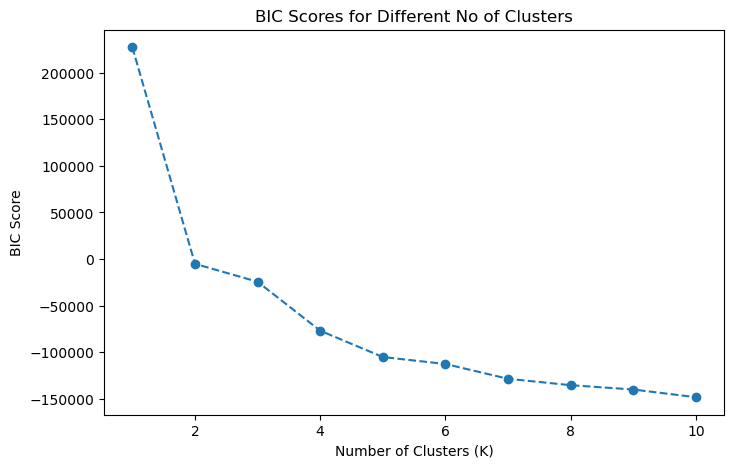

Optimal number of clusters (K): 10


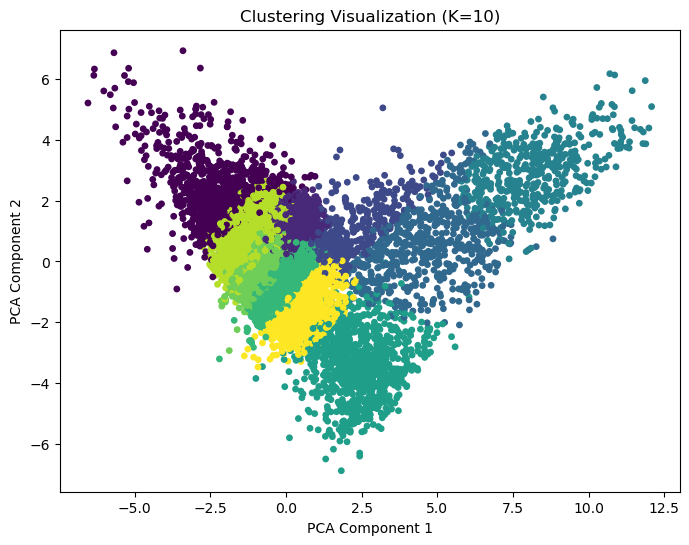

In [68]:
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

K_range = range(1, 11) 

# fitting Gaussian mixtures for each K and getting BIC
bic_scores = []
for K in K_range:
    gmm = GaussianMixture(n_components=K, random_state=42)
    gmm.fit(data_normalized)
    bic_scores.append(gmm.bic(data_normalized))

# Plot BIC scores to get the most optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(K_range, bic_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('BIC Score')
plt.title('BIC Scores for Different No of Clusters')
plt.show()

# Select the optimal K (lowest BIC)
optimal_K = K_range[np.argmin(bic_scores)]
print(f"Optimal number of clusters (K): {optimal_K}")

# Fitting Gaussian mixtures with optimal K
gmm = GaussianMixture(n_components=optimal_K, random_state=42)
gmm.fit(data_normalized)

# Predicting soft cluster assignments (probabilities)
soft_clusters = gmm.predict_proba(data_normalized)

# Predict hard cluster
hard_clusters = gmm.predict(data_normalized)

# Visualize the clustering results using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_normalized)

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=hard_clusters, cmap='viridis', s=15)
#plt.colorbar(label='Cluster')
plt.title(f'Clustering Visualization (K={optimal_K})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [47]:
###Jara 1. main alg from notes 2. simpler one

In [51]:
data = pd.read_csv("HTRU_2.csv")
features = data.values
features.shape

(17898, 8)

In [54]:
np.random.rand(7, 3)

array([[0.5491889 , 0.70463728, 0.2501281 ],
       [0.3662311 , 0.60447246, 0.17480587],
       [0.99059804, 0.6683132 , 0.8246008 ],
       [0.05936511, 0.9936265 , 0.6642561 ],
       [0.71421183, 0.54901662, 0.59721043],
       [0.45393163, 0.0378642 , 0.04202704],
       [0.17322313, 0.06963264, 0.82598381]])

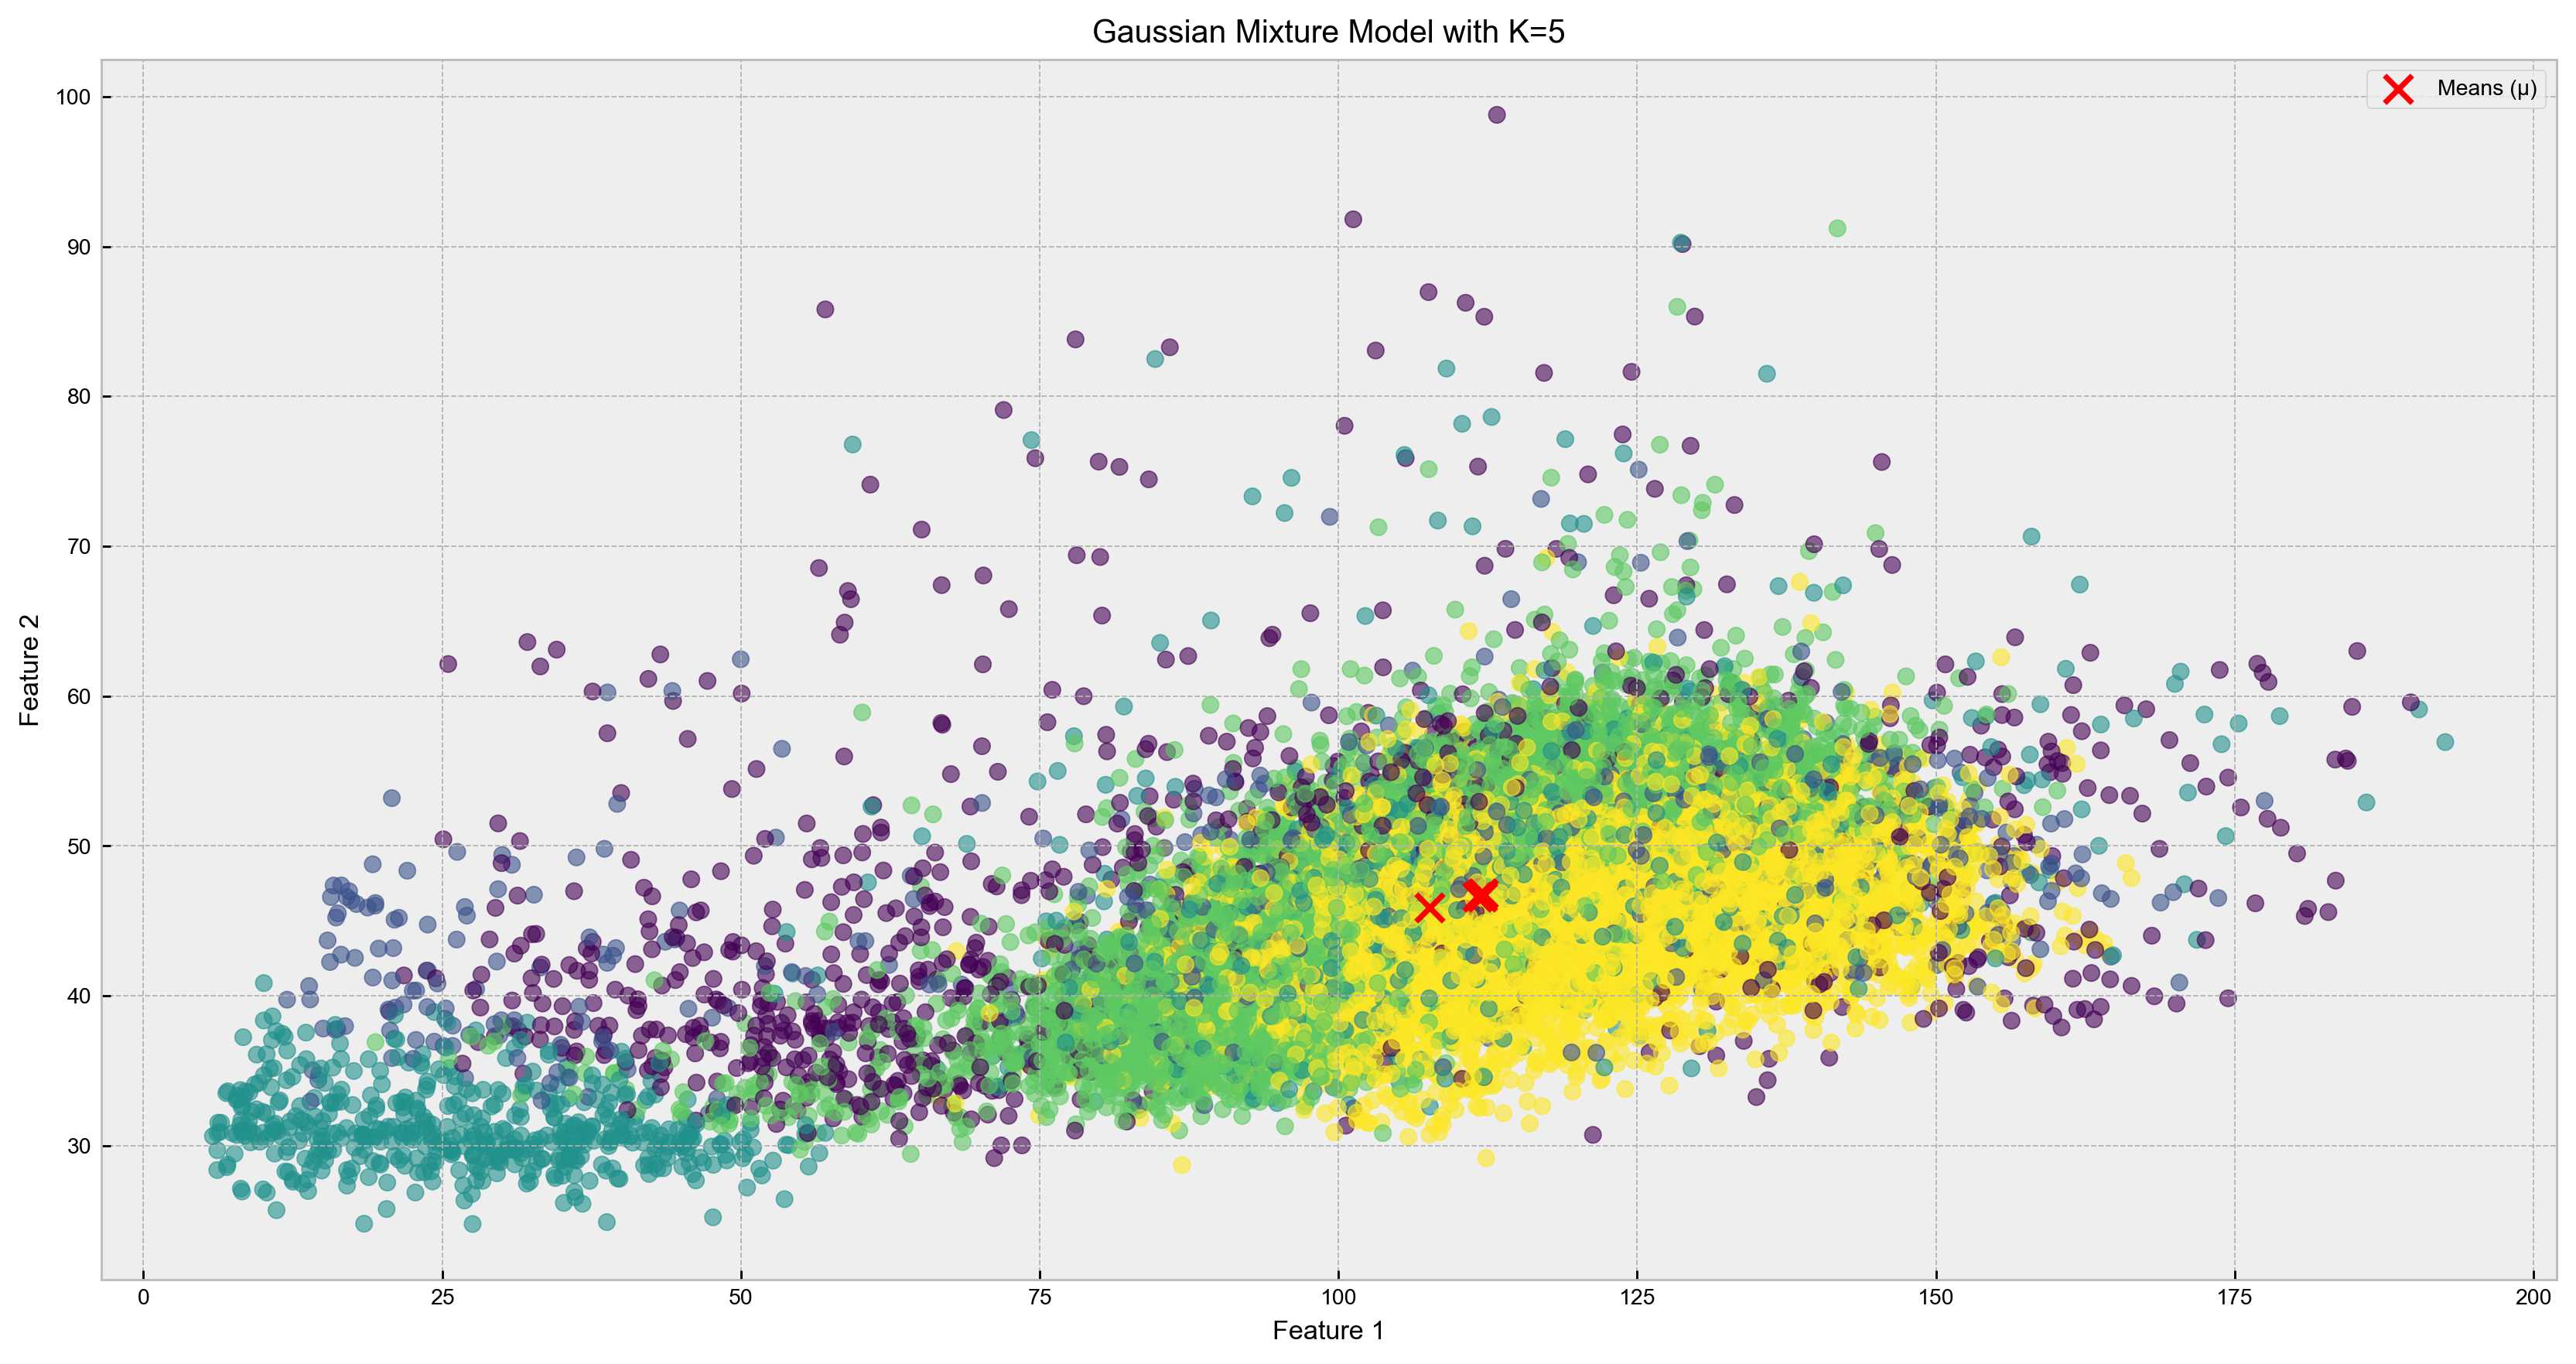

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def gaussian_mixture_em(X, K, epsilon=1e-6, max_iter=100):
    N, M = X.shape  # N is number of data points, M is number of features

    # Step 1: Initialize the responsibilities q_nk randomly (uniform distribution)
    q = np.random.rand(N, K)
    q /= q.sum(axis=1, keepdims=True)  # Normalize so that each row sums to 1

    # Step 2: Initialize parameters (pi_k, mu_k, sigma_k)
    pi = np.mean(q, axis=0)  # The initial mixture weights
    mu = np.dot(q.T, X) / q.sum(axis=0)[:, np.newaxis]  # The initial means
    sigma = np.zeros((K, M, M))
    for k in range(K):
        diff = X - mu[k]
        sigma[k] = np.dot((q[:, k][:, np.newaxis] * diff).T, diff) / q[:, k].sum()

    # EM Algorithm loop
    for iteration in range(max_iter):
        # E-step: Compute responsibilities (q_nk)
        for k in range(K):
            # Compute the Gaussian distribution for each data point
            pdf = multivariate_normal.pdf(X, mean=mu[k], cov=sigma[k])
            q_nk = pi[k] * pdf  # Unnormalized responsibility
            q[:, k] = q_nk

        # Normalize responsibilities so each row sums to 1
        q /= q.sum(axis=1, keepdims=True)

        # M-step: Update parameters (pi_k, mu_k, sigma_k)
        for k in range(K):
            N_k = q[:, k].sum()  # The effective number of points in cluster k
            pi[k] = N_k / N  # Update mixture weight (pi_k)
            mu[k] = np.dot(q[:, k], X) / N_k  # Update mean (mu_k)
            diff = X - mu[k]
            sigma[k] = np.dot((q[:, k][:, np.newaxis] * diff).T, diff) / N_k  # Update covariance (sigma_k)

        # Convergence check (if change in q is below epsilon)
        if np.linalg.norm(q - q) < epsilon:
            break

    return pi, mu, sigma, q


K = 5
X = data.values

# Run the EM algorithm
pi, mu, sigma, q = gaussian_mixture_em(X, K)

# Plot the results
#plt.figure(figsize=(4, 4))
plt.scatter(X[:, 0], X[:, 1], c=np.argmax(q, axis=1), cmap='viridis', alpha=0.6)
plt.scatter(mu[:, 0], mu[:, 1], c='red', marker='x', s=100, label='Means (μ)')
plt.title(f"Gaussian Mixture Model with K={K}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


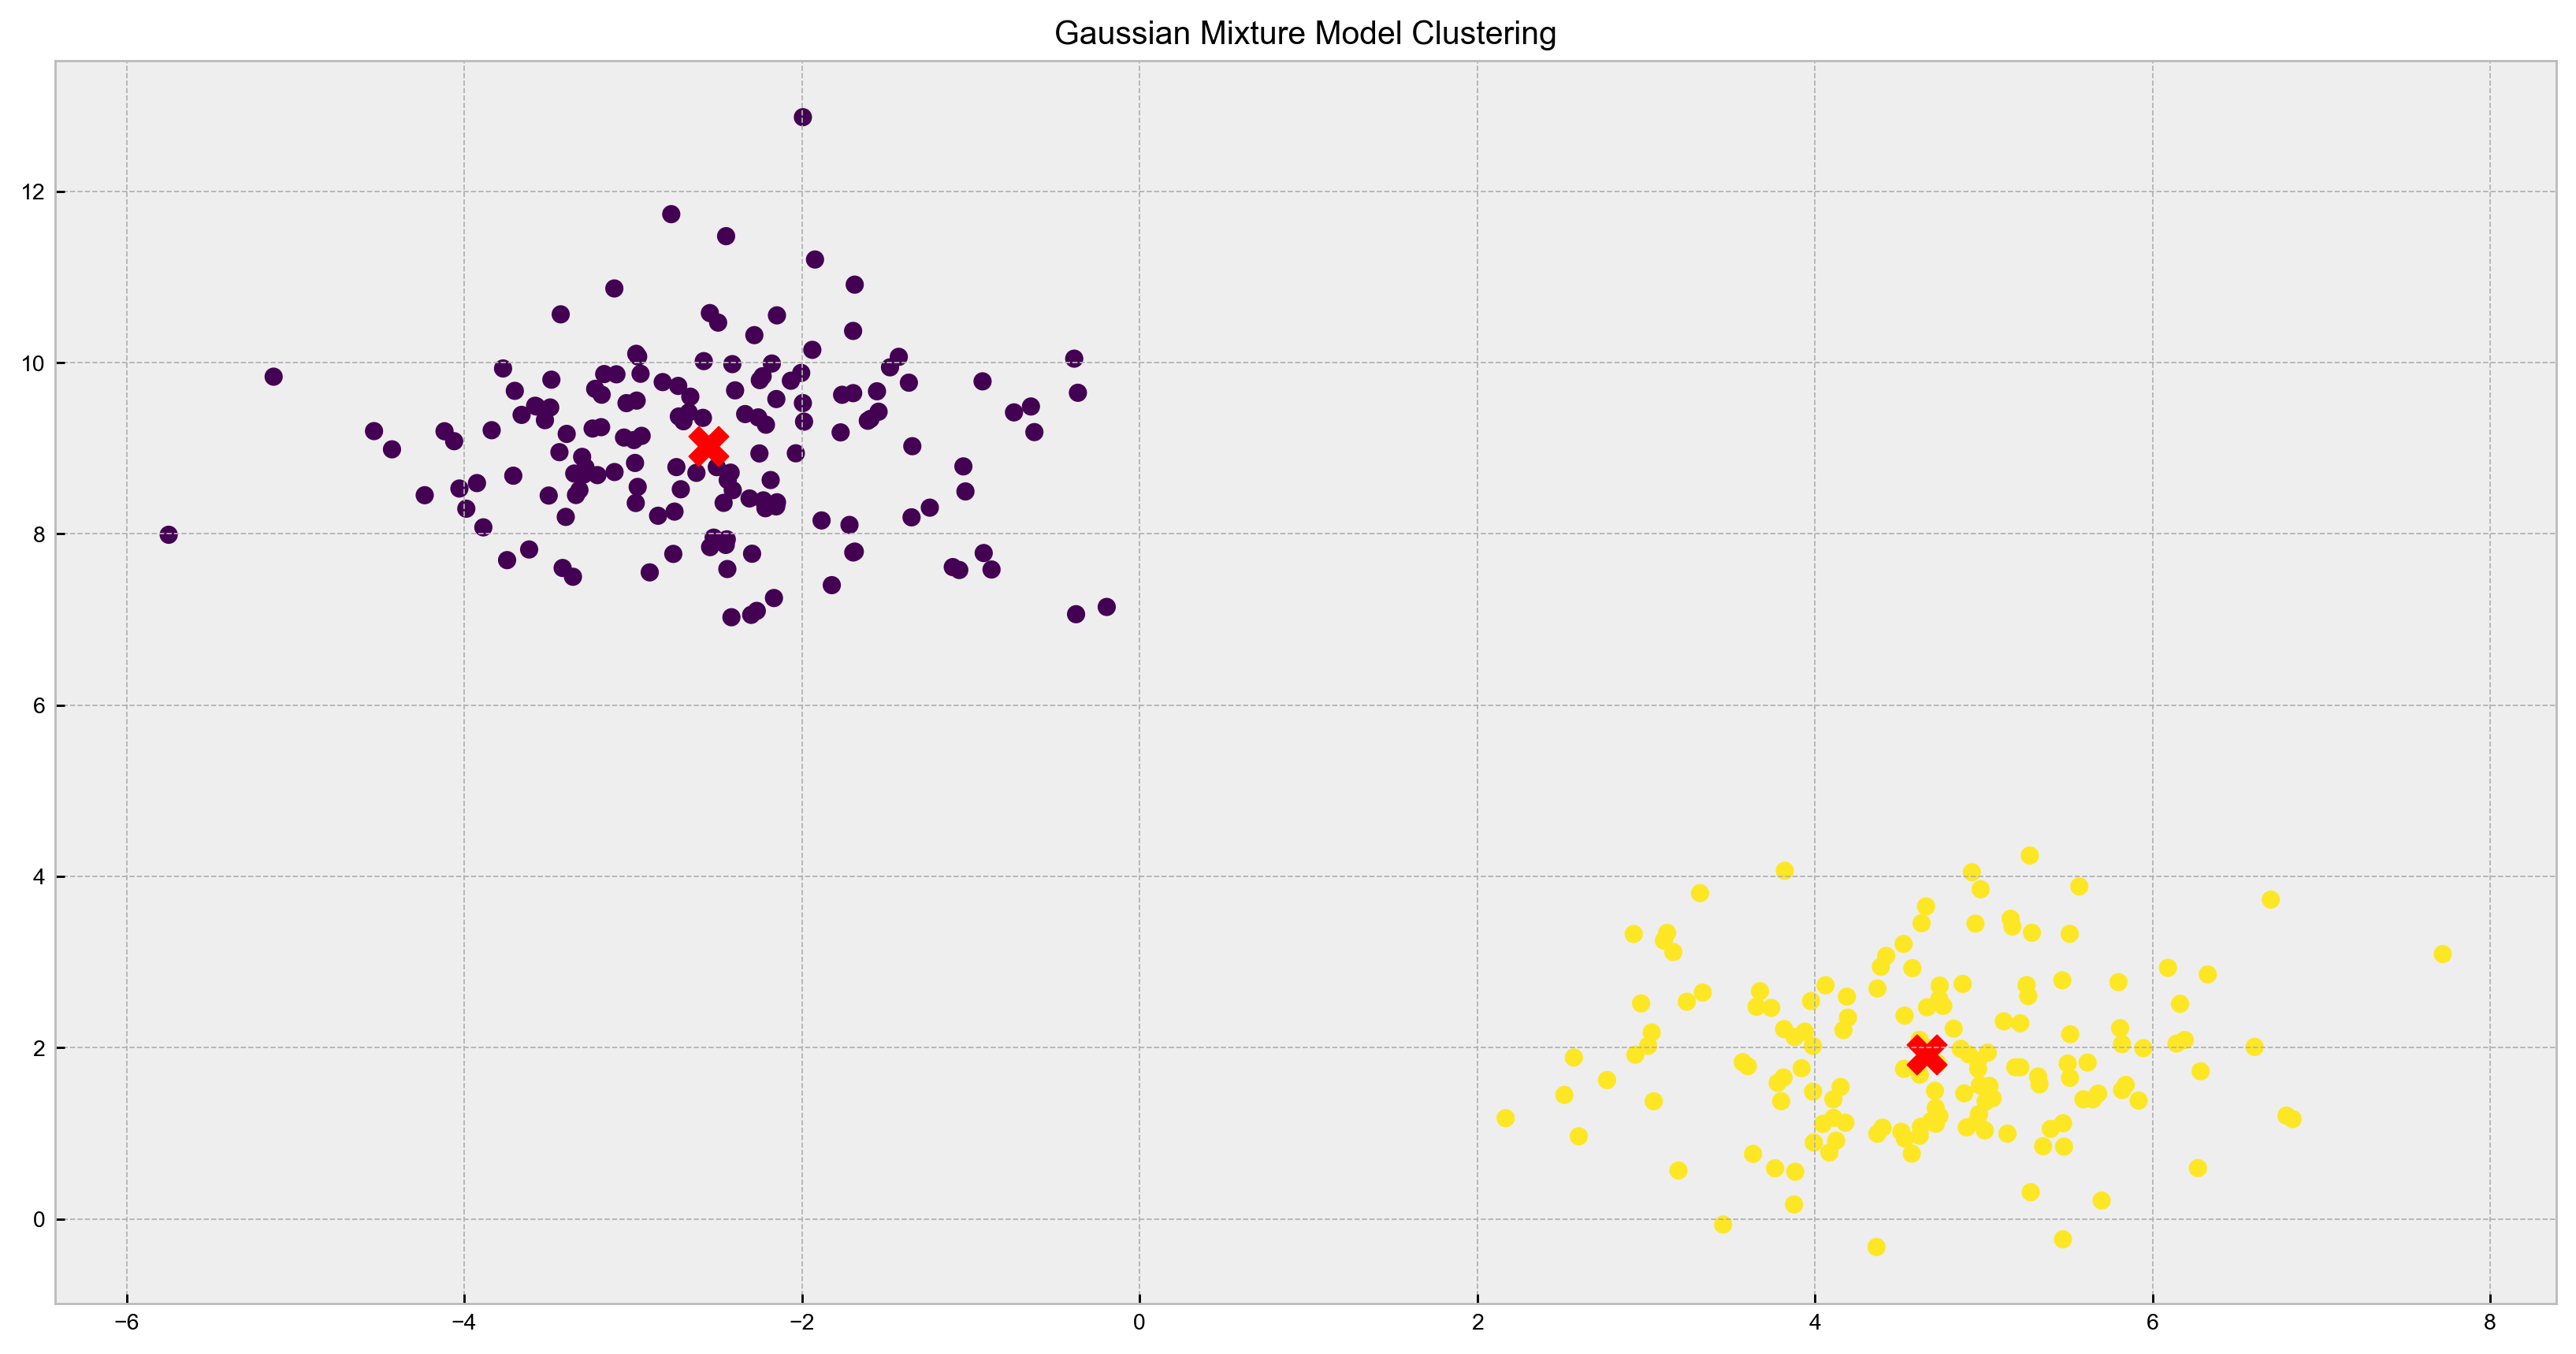

In [57]:
import numpy as np
from scipy.stats import multivariate_normal

class GaussianMixtureModel:
    def __init__(self, n_components, max_iter=100, tol=1e-6):
        self.n_components = n_components
        self.max_iter = max_iter
        self.tol = tol
    
    def fit(self, X):
        N, D = X.shape
        K = self.n_components
        
        # Initialize parameters
        self.pi = np.ones(K) / K  # Mixture weights
        self.mu = X[np.random.choice(N, K, False)]  # Randomly initialize means
        self.sigma = np.array([np.cov(X.T)] * K)  # Initialize covariance as the same for each component
        
        # Log-likelihood history for convergence check
        log_likelihoods = []
        
        for iteration in range(self.max_iter):
            # E-step: Compute responsibilities
            gamma = np.zeros((N, K))  # Responsibilities
            for k in range(K):
                gamma[:, k] = self.pi[k] * multivariate_normal.pdf(X, mean=self.mu[k], cov=self.sigma[k])
            
            # Normalize responsibilities
            gamma /= gamma.sum(axis=1, keepdims=True)
            
            # M-step: Update parameters
            N_k = gamma.sum(axis=0)  # Total responsibility for each cluster
            
            # Update means
            self.mu = np.dot(gamma.T, X) / N_k[:, np.newaxis]
            
            # Update covariances
            for k in range(K):
                diff = X - self.mu[k]
                self.sigma[k] = np.dot(gamma[:, k] * diff.T, diff) / N_k[k]
            
            # Update mixture weights
            self.pi = N_k / N
            
            # Compute log-likelihood for convergence check
            log_likelihood = np.sum(np.log(np.sum(gamma * self.pi, axis=1)))
            log_likelihoods.append(log_likelihood)
            
            if iteration > 0 and np.abs(log_likelihood - log_likelihoods[-2]) < self.tol:
                break
        
        return self
    
    def predict(self, X):
        # Assign each point to the cluster with the highest responsibility
        gamma = np.zeros((X.shape[0], self.n_components))
        for k in range(self.n_components):
            gamma[:, k] = self.pi[k] * multivariate_normal.pdf(X, mean=self.mu[k], cov=self.sigma[k])
        
        return np.argmax(gamma, axis=1)

# Example usage
if __name__ == "__main__":
    # Generate synthetic data (for example, two-dimensional data with two clusters)
    from sklearn.datasets import make_blobs
    X, _ = make_blobs(n_samples=300, centers=2, cluster_std=1.0, random_state=42)
    
    # Initialize and fit GMM
    gmm = GaussianMixtureModel(n_components=2)
    gmm.fit(X)
    
    # Predict clusters
    labels = gmm.predict(X)
    
    # Plot the results
    import matplotlib.pyplot as plt
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.scatter(gmm.mu[:, 0], gmm.mu[:, 1], marker='X', s=200, c='red')
    plt.title("Gaussian Mixture Model Clustering")
    plt.show()


In [ ]:
#######3333extra

import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rng
from numpy import ndarray
from numpy.linalg import cholesky, solve
from sklearn.mixture import GaussianMixture as GMM

np.set_printoptions(precision=4, floatmode="fixed", suppress=True)
rng.seed(seed=2023)  # Fixes random seed

X = np.array(
    [
        [0, 0],
        [0, 1],
        [-1, 2],
        [2, 0],
        [3, 0],
        [4, -1],
    ]
)
QUERY = np.array([1, 1])
plt.scatter(*X.T)
plt.scatter(*QUERY.T);

def normal(x: ndarray, mean: ndarray, cov: ndarray) -> ndarray:
    """Density of multivariate Normal distribution at x.

    Returns:
       exp(-½(x-μ)Σ⁻¹(x-μ)) / √( (2π)ᵐ |Σ⁻¹| )
    """
    # factorize Σ = LLᵀ, L is lower triangular
    L = cholesky(cov)
    # note: det(Σ⁻¹) = det(Σ)⁻¹ and det(Σ) = det(LLᵀ) = det(L)det(Lᵀ) = det(L)²
    # L is triangular, hence det(L) is product of diagonal entries.
    coef = np.prod(np.diag(L)) / (2 * np.pi) ** (mean.size / 2)

    # note: (x-μ)Σ⁻¹(x-μ) = (x-μ)L⁻ᵀL⁻¹(x-μ) = ‖L⁻¹(x-μ)‖²
    z = solve(L, x - mean)
    return coef * np.exp(-0.5 * z.dot(z))


def E_step(X, weights, means, covs) -> ndarray:
    """Return estimated probabilities q(n, k) ≔ Pr(xₙ belongs to cₖ)."""
    Q = np.zeros((len(X), len(weights)))  # N×K
    # iterate over datapoints
    for n, x in enumerate(X):
        # iterate over clusters
        for k, (pi, mu, sigma) in enumerate(zip(weights, means, covs)):
            # compute density value
            Q[n, k] = pi * normal(x, mu, sigma)
    return Q / Q.sum(axis=-1, keepdims=True)


def M_step(x: ndarray, q: ndarray) -> tuple[ndarray, ndarray, ndarray]:
    """Compute the new cluster paramters from the conditional densities p(n∣k).

    Fit the mixture model to the data, using the soft assignments P[n,k] as weights.
    I.e. maximize the weighted, expected log-likelihood:

        maximize  ∑ₙₖ qₙₖlog πₖpₖ(xₙ) = ∑ₙₖ qₙₖ log πₖ𝓝(xₙ∣μₖ,Σₖ)
          π,μ,Σ

        s.t. πₖ∈ℝ, μₖ∈ℝᵐ, Σₖ∈ℝᵐ×ℝᵐ
        and ∑ₖπₖ=1
        and πₖ≥0 and Σₖ≥0 (positive semi-definite)

    For Gaussian mixture models, this constrained optimization problem has an analytic solution,
    given by:

    - πₖ = ⅟ₙ∑ₙ qₙₖ
    - μₖ = 𝐄_{x∼pₖ}[x]             = ∑ₙ q_{nk} xₙ
    - Σₖ = 𝐄_{x∼pₖ}[(x-μₖ)(x-μₖ)ᵀ] = ∑ₙ q_{nk} (xₙ-μₖ)(xₙ-μₖ)ᵀ

    Replacing qₙₖ with the normalized joint distribution pₙₖ = qₙₖ/(∑ₙₖ qₙₖ) = ⅟ₙqₙₖ:

    - πₖ = ∑ₙ p(n,k) = p(k)
    - p(n∣k) = p(n,k) / p(k) = q(n,k) / ∑ₙ q(n,k)
    - Dₖ: weighted empirical distribution of xₙ with weights wₙ ≔ p(n∣k)
    - μₖ = 𝐄_{x∼Dₖ}[x]   = ∑ₙ wₙ xₙ
    - Σₖ = Var_{x∼Dₖ}[x] = ∑ₙ wₙ (xₙ-μₖ)(xₙ-μₖ)ᵀ = ∑ₙ wₙxₙxₙᵀ - μₖμₖᵀ

    So we see that πₖ is simply the estimated marginal distribution, and
    μₖ and Σₖ are simply the conditional excepted mean and covariance.
    """
    # NOTE: Q is normalized row-size, hence sum(Q) = N
    N, K = q.shape
    M, D = x.shape
    assert N == M and np.allclose(q.sum(), N)

    # compute joint distributiuon p(n, k)
    p = q / q.sum()  #  N×K
    # compute the marginal distribution p(k)
    π = np.sum(p, axis=0)  # K
    # compute the conditional distribution p(n∣k)
    W = p / π  # N×K

    μ = np.empty((K, D))
    Σ = np.empty((K, D, D))

    for k, w in enumerate(W.T):
        # μₖ = 𝐄_{x∼xₙ∣k)}[x] = ∑ₙ p(n∣k) xₙ
        μ[k] = np.einsum("n, nm -> m", w, x)
        # Σₖ = 𝐄_{x∼xₙ∣k)}[x] = ∑ₙ wₙ (xₙ-μₖ)(xₙ-μₖ)ᵀ
        Σ[k] = np.einsum("n, nk, nl -> kl", w, x - μ[k], x - μ[k])
    return π, μ, Σ

MAXITER = 100
N = len(X)
K = 2
# initialize parameters
π = [0.5, 0.5]
μ = [np.array([0, 1]), np.array([3, 0])]
Σ = [np.eye(2), np.eye(2)]
clusters = rng.rand(N, K)

# print("BEFORE:", E_step(QUERY, weights, means, covariances))

for it in range(MAXITER):
    print(f"{it=:3d} {'-'*40}")
    for k in range(K):
        print(f"π[{k}]={π[k]}")
        print(f"μ[{k}]={μ[k]}")
        print(f"Σ[{k}]={Σ[k]}")

    clusters_old = clusters.copy()
    clusters = E_step(X, π, μ, Σ)
    π, μ, Σ = M_step(X, clusters)

    if np.allclose(clusters, clusters_old):
        break
else:
    raise RuntimeError("Did not converge in {MAXITER=} iterations!")


########## # Solution using SKLEARN library

model = GMM(n_components=K)
model.fit(X)
for k in range(K):
    print(f"π[{k}]={model.weights_[k]}")
    print(f"μ[{k}]={model.means_[k]}")
    print(f"Σ[{k}]={model.covariances_[k]}")

Z = QUERY
# Z = np.array([0.5, 0.5])

p = np.array([normal(Z, μ[k], Σ[k]) for k in range(K)])
p_model = p / p.sum()
p_sklearn = model.predict_proba(Z.reshape(1, -1))

# NOTE: the clusters are not necessarily in the same order!
print(f"{p_model=}\n{p_sklearn=}")


##### visualising

from scipy.linalg import sqrtm
from scipy.stats import chi2, multivariate_normal


def draw_normal(
    mean=None,
    cov=None,
    quantile=0.5,
    ax=None,
    num_samples: int = 0,
    draw_axes: bool = True,
) -> plt.Axes:
    """Draw an ellipse with a given position and covariance"""

    mean = np.zeros(2) if mean is None else np.asarray(mean)
    cov = np.eye(2) if cov is None else np.asarray(cov)
    quantile = np.sort(np.atleast_1d(quantile))
    assert all((quantile > 0) & (quantile < 1)), "confidence must be in (0, 1)"

    if ax is None:
        _, ax = plt.subplots(constrained_layout=True)
        ax.set_aspect("equal", "box")
        ax.axis("off")

    # create circles
    T = np.linspace(0, 2 * np.pi, num=1000)
    C = np.stack([np.cos(T), np.sin(T)], axis=-1)  # N×2

    # compute correct radii via χ²-inverse survival function
    radii = np.sqrt(chi2.isf(1 - quantile, df=mean.size))

    # compute ellipses
    S = sqrtm(cov)  # S⋅S = covariance
    circles = np.einsum("..., nx -> ...nx", radii, C)
    Z = np.einsum("...nx, zx -> ...nz", circles, S) + mean
    Z = np.moveaxis(Z, -1, -2)  # ...×2×N

    for q, (x, y) in zip(quantile, Z):
        ax.plot(x, y, lw=2, label=f"{q=:.2f}")

    if num_samples:
        distribution = multivariate_normal(mean, cov=cov)
        samples = distribution.rvs(num_samples)
        u, v = solve(S, (samples - mean).T)

        inside = np.zeros_like(u, dtype=bool)
        for r in radii:
            # start with the innermost ellipse
            inside_prev = inside
            inside = u**2 + v**2 <= r**2
            mask = inside & ~inside_prev
            ax.scatter(
                *samples[mask].T,
                marker=".",
                lw=1,
                alpha=0.3,
                label=f"{mask.mean():.1%}",
            )
        mask = u**2 + v**2 > r**2
        ax.scatter(
            *samples[mask].T, marker=".", lw=1, alpha=0.3, label=f"{mask.mean():.1%}"
        )

    # main axes
    if draw_axes:
        eigvals, eigvecs = np.linalg.eigh(cov)
        eigvecs *= radii[-1] * np.sqrt(eigvals)
        E = mean + np.stack([eigvecs[:, 0], np.zeros(2), eigvecs[:, 1]], axis=0)
        ax.plot(*E.T, "-k", lw=2)

    ax.legend()
    return ax

COLORS = ["red", "blue", "green"]
K = 2

# predict
Yhat = model.predict(X)
Ystar = model.predict(QUERY.reshape(1, -1))

fig, ax = plt.subplots()

for k in range(K):
    draw_normal(μ[k], Σ[k], quantile=0.99, ax=ax, draw_axes=False)
    ax.plot(*X[Yhat == k].T, ".", color=COLORS[k])
ax.plot(*QUERY.T, "x", color=COLORS[int(Ystar)])
fig.savefig("pics/tutorial11-gmm-ellipses.pdf")

In [ ]:
####geometric median

import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm

np.set_printoptions(precision=6, floatmode="fixed", suppress=True)

X = np.array(
    [
        [-1, -1],
        [-1, 1],
        [1, -1],
        [1, 1],
        [10, 0],
    ]
)
plt.scatter(*X.T);

def weizfeld(
    x: np.ndarray, rtol: float = 1e-05, atol: float = 1e-08, maxiter: int = 100
) -> np.ndarray:
    """Compute the geometric median of a set of points.

    Args:
        x: n×d array, a set of points.

    Returns:
        mu: d array, the geometric median.
    """
    # initialize with the mean
    mu = np.mean(x, axis=0)

    for it in range(maxiter):
        print(f"{it=:3d}  {mu=}")
        mu_prev = mu.copy()
        inorm = 1 / norm(x - mu, axis=1)
        mu = (x.T @ inorm) / np.sum(inorm)
        if np.allclose(mu, mu_prev, rtol=rtol, atol=atol):
            return mu
    raise RuntimeWarning(f"No convergence in {maxiter=} iterations.")


mu = weizfeld(X)


Z = X.copy()
Z[-1] = [100, 0]
weizfeld(Z)

In [ ]:
####### Hiearchichal clustering

# Re-import required libraries after execution state reset
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Generate sample data
np.random.seed(42)
X = np.random.rand(20, 2)  # 20 points in 2D space

# Create dendrogram
plt.figure(figsize=(10, 5))
plt.title("Hierarchical Clustering Dendrogram")
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

# Apply hierarchical clustering
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

# Plot clusters
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(X[y_hc == i, 0], X[y_hc == i, 1], label=f'Cluster {i+1}')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Clusters using Hierarchical Clustering")
plt.legend()
plt.show()


# Correct the parameter name from 'metric' to 'affinity' for AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

# Plot clusters
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(X[y_hc == i, 0], X[y_hc == i, 1], label=f'Cluster {i+1}')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Clusters using Hierarchical Clustering")
plt.legend()
plt.show()


####single linkage

# Implement Hierarchical Clustering using sklearn with Single Linkage

# Implementing Hierarchical Clustering using sklearn with Single Linkage

from sklearn.cluster import AgglomerativeClustering

# Apply hierarchical clustering using single linkage
hc_single = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='single')
y_hc_single = hc_single.fit_predict(X)

# Plot clusters
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(X[y_hc_single == i, 0], X[y_hc_single == i, 1], label=f'Cluster {i+1}')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Clusters using Hierarchical Clustering (Single Linkage)")
plt.legend()
plt.show()

# Generate dendrogram using single linkage
plt.figure(figsize=(10, 5))
plt.title("Hierarchical Clustering Dendrogram (Single Linkage)")
dendrogram = sch.dendrogram(sch.linkage(X, method='single'))
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

# Correcting the parameter: 'affinity' instead of 'metric' for AgglomerativeClustering

# Apply hierarchical clustering using single linkage
hc_single = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
y_hc_single = hc_single.fit_predict(X)

# Plot clusters
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(X[y_hc_single == i, 0], X[y_hc_single == i, 1], label=f'Cluster {i+1}')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Clusters using Hierarchical Clustering (Single Linkage)")
plt.legend()
plt.show()

# Generate dendrogram using single linkage
plt.figure(figsize=(10, 5))
plt.title("Hierarchical Clustering Dendrogram (Single Linkage)")
dendrogram = sch.dendrogram(sch.linkage(X, method='single'))
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()





######### froom scratch 

from scipy.spatial.distance import pdist, squareform

class HierarchicalClusteringScratch:
    def __init__(self, X):
        self.X = X
        self.num_points = X.shape[0]
        self.clusters = {i: [i] for i in range(self.num_points)}
        self.distance_matrix = squareform(pdist(X, metric='euclidean'))  # Compute all pairwise distances
        np.fill_diagonal(self.distance_matrix, np.inf)  # Ignore self-distances
        self.history = []

    def find_closest_clusters(self):
        """Find the pair of clusters with the smallest distance."""
        return np.unravel_index(np.argmin(self.distance_matrix), self.distance_matrix.shape)

    def merge_clusters(self, c1, c2):
        """Merge two clusters and update distances."""
        new_cluster_id = len(self.history) + self.num_points

        # Record merge in history
        cluster_size = len(self.clusters[c1]) + len(self.clusters[c2])
        self.history.append([c1, c2, self.distance_matrix[c1, c2], cluster_size])

        # Merge clusters
        self.clusters[new_cluster_id] = self.clusters[c1] + self.clusters[c2]
        del self.clusters[c1], self.clusters[c2]

        # Update distance matrix using average linkage
        new_distances = np.mean(
            [self.distance_matrix[min(i, j), max(i, j)] for i in self.clusters[new_cluster_id] for j in range(self.num_points) if i != j],
            axis=0
        )

        # Append new row/column for new cluster in distance matrix
        new_distance_matrix = np.vstack((self.distance_matrix, new_distances))
        new_distance_matrix = np.hstack((new_distance_matrix, np.append(new_distances, np.inf).reshape(-1, 1)))

        self.distance_matrix = new_distance_matrix

    def fit(self):
        """Perform hierarchical clustering."""
        while len(self.clusters) > 1:
            c1, c2 = self.find_closest_clusters()
            self.merge_clusters(c1, c2)
        return np.array(self.history)

# Run the corrected hierarchical clustering implementation
hc_scratch = HierarchicalClusteringScratch(X)
linkage_matrix = hc_scratch.fit()

# Generate dendrogram
plt.figure(figsize=(10, 5))
plt.title("Hierarchical Clustering Dendrogram (Corrected Implementation)")
sch.dendrogram(linkage_matrix)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

